In [1]:
# `cnn_4_llm_memo`

# Copyright 2025-present Laboratoire d'Informatique de Polytechnique.
# Apache Licence v2.0.

import os

os.chdir(os.path.dirname(os.path.abspath('')))

**WARNING: This notebook must be executed on the same machine as the one where the attention patterns are stored. Or, alternatively, you can extract some specific patterns and store a smaller *.h5py* file locally using `06_extract_patterns.ipynb` notebook remotely.**

## Setup

In [2]:
import src

In [3]:
from src.patterns import (
    PatternsConfig,
    get_patterns_for_repr,
    plot_attention_pattern,
    get_train_eval_test,
    get_default_tokenizer,
)
from src.utils.constants import *
from src.utils import paths

In [4]:
import numpy as np
from matplotlib import pyplot as plt

## Configs

In [5]:
# You can use the following to declare your base output dir if it is not ./output

import os
os.environ["_BASE_OUTPUT_DIR"] = "/lustre/fsn1/projects/rech/yfw/upp42qa/output_regu_detect"

In [6]:
patterns_cfg_theirs = PatternsConfig.autoconfig("V1iV")
patterns_cfg_theirs

PatternsConfig[ V1iVW9ujrbRcXe1E3kw26A ](
	_base_output_dir: /lustre/fsn1/projects/rech/yfw/upp42qa/output_regu_detect
	deduped: True
	duplicates_threshold: 5
	eval_base_size: 2000
	inference_bs: 16
	rouge_threshold: 0.5
	seed: 42
	size: 12b
	tax_name: other_recite_reconstruct_recollect
	train_base_size: 4000
)

In [7]:
patterns_cfg_ours = PatternsConfig.autoconfig("rasy")
patterns_cfg_ours

PatternsConfig[ rasyq52cr19yVj72U1ZkFQ ](
	_base_output_dir: /lustre/fsn1/projects/rech/yfw/upp42qa/output_regu_detect
	deduped: True
	duplicates_threshold: 50
	eval_base_size: 2000
	inference_bs: 16
	rouge_threshold: 0.5
	seed: 42
	size: 12b
	tax_name: merge_2_other_guess_recollect_recite
	train_base_size: 4000
)

In [8]:
df_theirs = get_train_eval_test(patterns_cfg_theirs)
df_theirs

2025-07-28 12:01:39.987 | INFO     | src.patterns.datasets:get_train_eval_test:364 - Looking in cache: /lustre/fsn1/projects/rech/yfw/upp42qa/output_regu_detect/patterns/V1iVW9ujrbRcXe1E3kw26A/train_eval_test.parquet
2025-07-28 12:01:39.989 | INFO     | src.patterns.datasets:get_train_eval_test:369 - Reading dataset from /lustre/fsn1/projects/rech/yfw/upp42qa/output_regu_detect/patterns/V1iVW9ujrbRcXe1E3kw26A/train_eval_test.parquet


,sequence_id,loss,prompt_perplexity,generation_perplexity,sequence_perplexity,text,is_incrementing,is_repeating,sequence_duplicates,max_frequency,...,memorization_score,rouge_3_prefix_to_suffix,rouge_L_prefix_to_suffix,is_code,cat_0,cat_1,cat_2,cat_3,part_train,part_eval
0,123188638,2.695312,8.382993,4.787971,40.137524,"muscle car And all the wheels are mag"" ""You m...",False,False,3,9362638615,...,0.00000,0.066667,0.18750,False,True,False,False,False,True,False
1,694127,2.589844,3.405081,4.933641,16.799450,"I}}}},{{{\bm{Q}}}})$ for some ${{\tilde{\rho}}...",False,False,1,8485755698,...,0.00000,0.000000,0.03125,False,True,False,False,False,True,False
2,46600814,2.287109,3.178704,2.326551,7.395417,"infinity of ${\mathbb{H}^2}$. In other words,...",False,False,2,9362638615,...,0.00000,0.100000,0.15625,False,True,False,False,False,True,False
3,142041746,2.753906,2.736737,2.046753,5.601426,"C_KDBXREADER_H\n\n#include ""KeePass2.h""\n#incl...",False,False,4,11740996961,...,0.21875,0.233333,0.31250,True,True,False,False,False,True,False
4,35242275,2.638672,3.602310,3.970338,14.302387,not as means to the ends of others; to recogn...,False,False,2,9362638615,...,0.00000,0.000000,0.18750,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,39080775,0.646973,1.536462,1.000132,1.536665,wn2411&file=wn2411sup0.html&mime=text/html); [...,False,False,2,10346382453,...,1.00000,0.200000,0.46875,True,False,False,False,True,False,True
23996,108948465,0.674316,2.807962,1.042926,2.928496,"(""f32.copysign"");\n }\n void operator()(f6...",False,False,1,11740996961,...,1.00000,0.666667,0.75000,True,False,False,False,True,False,True
23997,51909348,0.618164,2.442390,1.013061,2.474289,"SMM_INTRINSICS_MM512_SET_EPI16(31, 31, 30, 30,...",False,False,1,9362638615,...,1.00000,0.000000,0.25000,True,False,False,False,True,False,True
23998,132580599,0.674805,1.579948,1.002481,1.583869,"bn"": {\n ""version"": ""0.1.1"",\n ""from...",False,False,5,11740996961,...,1.00000,0.200000,0.43750,False,False,False,False,True,False,True


In [9]:
df_ours = get_train_eval_test(patterns_cfg_ours)
df_ours

2025-07-28 12:01:40.131 | INFO     | src.patterns.datasets:get_train_eval_test:364 - Looking in cache: /lustre/fsn1/projects/rech/yfw/upp42qa/output_regu_detect/patterns/rasyq52cr19yVj72U1ZkFQ/train_eval_test.parquet
2025-07-28 12:01:40.133 | INFO     | src.patterns.datasets:get_train_eval_test:369 - Reading dataset from /lustre/fsn1/projects/rech/yfw/upp42qa/output_regu_detect/patterns/rasyq52cr19yVj72U1ZkFQ/train_eval_test.parquet


,sequence_id,loss,prompt_perplexity,generation_perplexity,sequence_perplexity,text,is_incrementing,is_repeating,sequence_duplicates,max_frequency,...,huffman_coding_length,memorization_score,rouge_3_prefix_to_suffix,rouge_L_prefix_to_suffix,is_code,cat_0,cat_1,cat_2,part_train,part_eval
0,123188638,2.695312,8.382993,4.787971,40.137524,"muscle car And all the wheels are mag"" ""You m...",False,False,3,9362638615,...,4.807087,0.00000,0.066667,0.18750,False,True,False,False,True,False
1,694127,2.589844,3.405081,4.933641,16.799450,"I}}}},{{{\bm{Q}}}})$ for some ${{\tilde{\rho}}...",False,False,1,8485755698,...,5.313901,0.00000,0.000000,0.03125,False,True,False,False,True,False
2,46600814,2.287109,3.178704,2.326551,7.395417,"infinity of ${\mathbb{H}^2}$. In other words,...",False,False,2,9362638615,...,5.187215,0.00000,0.100000,0.15625,False,True,False,False,True,False
3,142041746,2.753906,2.736737,2.046753,5.601426,"C_KDBXREADER_H\n\n#include ""KeePass2.h""\n#incl...",False,False,4,11740996961,...,5.416667,0.21875,0.233333,0.31250,True,True,False,False,True,False
4,35242275,2.638672,3.602310,3.970338,14.302387,not as means to the ends of others; to recogn...,False,False,2,9362638615,...,4.604651,0.00000,0.000000,0.18750,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,16515813,0.559570,1.156433,1.009487,1.167404,License. You may obtain a copy of the Licens...,False,False,14853,11740996961,...,5.136752,1.00000,0.066667,0.12500,True,False,False,True,False,True
17996,19641834,0.711426,3.406995,1.033262,3.520319,reference to Newtonsoft.Json.dll within Visua...,False,False,2,11740996961,...,5.321799,1.00000,0.000000,0.09375,True,False,False,True,False,True
17997,8495410,0.575195,1.910261,1.011234,1.931721,"Internet,” Trump said.Kaplan-Meier plots summ...",False,False,125,10346382453,...,4.944954,1.00000,0.066667,0.15625,False,False,False,True,False,True
17998,95556049,0.619141,2.869972,1.005987,2.887155,"in Paris, and many others. She teaches creati...",False,False,561,11740996961,...,5.011364,1.00000,0.000000,0.06250,False,False,False,True,False,True


In [39]:
df_teaser = [df_ours, df_ours, df_ours, df_theirs]
patterns_cfg_teaser = [patterns_cfg_ours, patterns_cfg_ours, patterns_cfg_ours, patterns_cfg_theirs]
classes_teaser = [0,1,2,3]
layers_teaser = [35,6,35,6]
titles_teaser = ["Non memorized", "Guess | Reconstruct", "Recall | Recite", "Guess | Recollect"]
idx_in_class = [17, 42, 17, 42]
loc_teaser = [
    np.where(df[f"cat_{idx_cls}"])[0][idx_in_cls]
    for idx_cls, idx_in_cls, df in zip(classes_teaser, idx_in_class, df_teaser)
]
attention_patterns = torch.stack([
    get_patterns_for_repr(df, patterns_cfg, loc)[layer:layer+1]
    for loc, layer, df, patterns_cfg in zip(loc_teaser, layers_teaser, df_teaser, patterns_cfg_teaser)
])
attention_patterns.size()

torch.Size([4, 1, 40, 64, 64])

In [40]:
sequence_id_teaser = [df.loc[loc, "sequence_id"] for loc, df in zip(loc_teaser, df_teaser)]

In [41]:
tokenizer = get_default_tokenizer()

In [42]:
for loc, df in zip(loc_teaser, df_teaser):
    print( df.loc[loc, "sequence_duplicates"])

2
1
783
5


In [43]:
all_indices = []
for loc, df in zip(loc_teaser, df_teaser):
    all_indices.append(int(df.loc[loc, "sequence_id"]))

df_ours.loc[df_ours["sequence_id"].tolist().index(all_indices[1])][["is_repeating", "is_incrementing"]]

is_repeating       False
is_incrementing     True
Name: 6042, dtype: object

In [44]:
for loc, df in zip(loc_teaser, df_teaser):
    print( df.loc[loc, "text"])
    print("\n" + 40*"#" + "\n")

 relationships can be divided into a whole range of modalities the intrinsic characteristics of which differ, either permitting or ruling out their coexistence in any particular collective or, in the case of relations, their interaction between a dominant form and one or two minor forms. I have chosen to examine four modes of identification and six relational modes,

########################################

22) -- (Y2);
    \draw[-stealth, thick] (R23) -- (Y3);
    \draw[-stealth, thick] (R24) -- (Y4);
    \draw[-stealth, thick] (R25) -- (Y5);

########################################

 of the shadows and into the living room and then maybe people won't mind so much when they see them up in the skies.

News reports are focusing on the Germanwings pilot's possible depression, following a familiar script in the wake of mass killings. But the evidence shows violence is extremely rare among the mentally

########################################

ificates:go_default_library",
        "//st

In [45]:
for loc, df in zip(loc_teaser, df_teaser):
    print("\n" + 40*"#" + "\n")
    print(">>>|" + tokenizer.decode(df.loc[loc, "tokens"][:32]) + "|<<<")
    print("")
    print(">>>|" + tokenizer.decode(df.loc[loc, "tokens"][32:]) + "|<<<")
    print("\n" + 40*"#" + "\n")


########################################

>>>| relationships can be divided into a whole range of modalities the intrinsic characteristics of which differ, either permitting or ruling out their coexistence in any particular collective or, in|<<<

>>>| the case of the most general, in any particular individual.

The first of these modalities is that of the _collective_ , which is the most|<<<

########################################


########################################

>>>|22) -- (Y2);
    \draw[-stealth, thick] (R23) -- (Y3);
    \draw[-ste|<<<

>>>|alth, thick] (R24) -- (Y4);
    \draw[-stealth, thick] (R25) -- (Y5);|<<<

########################################


########################################

>>>| of the shadows and into the living room and then maybe people won't mind so much when they see them up in the skies.

News reports are focusing|<<<

>>>| on the Germanwings pilot's possible depression, following a familiar script in the wake of mass killings. But the ev

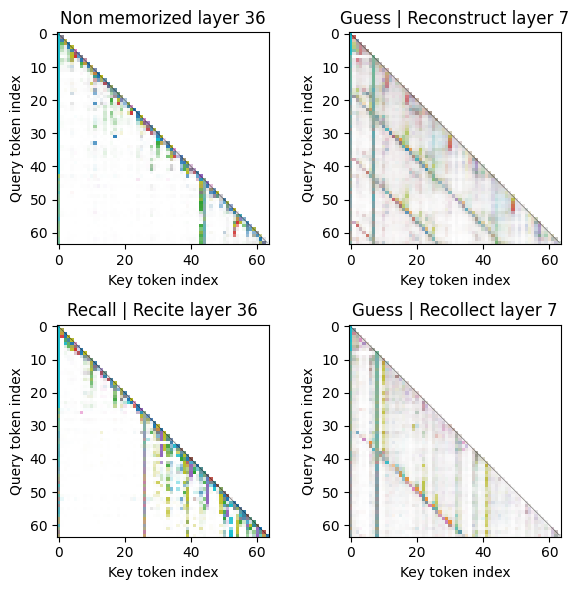

In [46]:
n_col = 2
n_row = 2
fig, axs = plt.subplots(n_row, n_col, figsize=(3 * n_col, 3 * n_row))

for idx in range(len(loc_teaser)):
    ax = axs[idx//2, idx%2]
    plot_attention_pattern(
        attention_patterns[idx,0,...],
        ax,
        head_pooling=None,
        gamma=1/5,
        add_diag=True,
        show_axlabels=True
    )
    ax.set_title(f"{titles_teaser[idx]} layer {layers_teaser[idx] + 1}")

fig.tight_layout()
fig.savefig(paths.figures / "02_example_attention_weights.pdf")
fig.show()